Contents:

- [Introduction](#Introduction)
- [Plots in state-space](#Plots-in-state-space)
- [Error bounds](#Error-bounds)

### Introduction

Consider the [Van der Pol equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator), which depends on two positive parameters $\mu$ and $\omega$:

In [1]:
from carlin.library import vanderpol
pretty_print(vanderpol(SR.var("mu"), SR.var("omega")).funcs())

[x1, -omega^2*x0 - (x0^2 - 1)*mu*x1]

Given numerical values of the parameters and initial conditions, we compute the Carleman linearized ODE at order $N$, solve the linear ODE and plot the result:

In [2]:
# initial condition
x0 = [0.0, 0.5]

# initial time
tini = 0

# final time
T = 10

# number of computation points
NPOINTS = 400

# parameters for vanderpol
mu = 0.6; omega=1.
vdp = vanderpol(mu, omega)

### Plots in state-space

Let us plot the solution of Carleman linearization for different orders:

/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


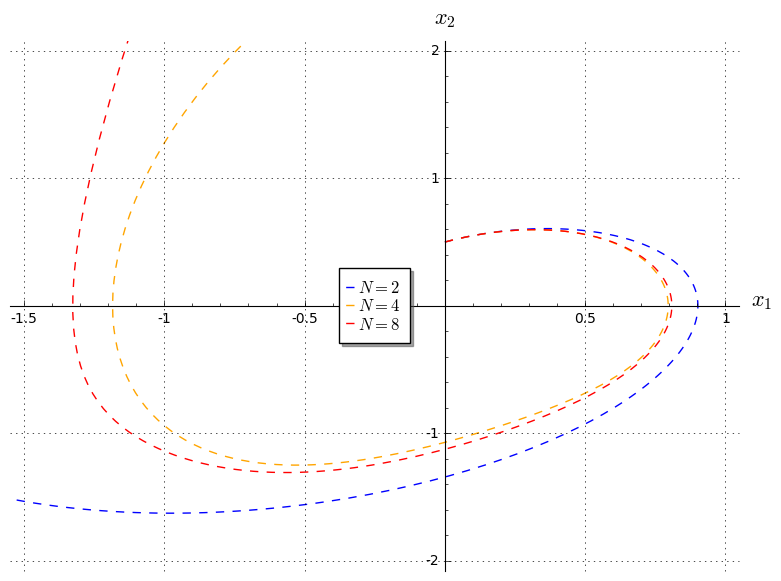

In [3]:
# plot min-max values
xmin=-1.5; xmax=1; ymin=-2; ymax=2

# solution using Carleman linearization of order N
from carlin.io import plot_truncated
Graphic = plot_truncated(vdp, 2, x0, tini, T, NPOINTS, gridlines=True, color="blue", linestyle="dashed", legend_label="$N=2$")
Graphic += plot_truncated(vdp, 4, x0, tini, T, NPOINTS, gridlines=True, color="orange", linestyle="dashed", legend_label="$N=4$")
Graphic += plot_truncated(vdp, 8, x0, tini, T, NPOINTS, gridlines=True, color="red", linestyle="dashed", legend_label="$N=8$")
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True, axes_labels = ['$x_1$', '$x_2$'])

We also plot the numerical solution obtained with a Runge-Kutta integration algorithm:

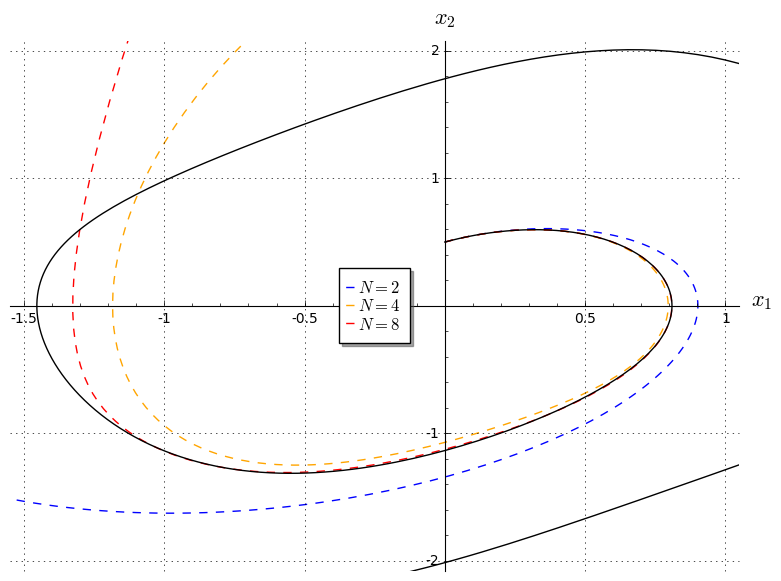

In [4]:
Graphic += vdp.plot_solution(x0, tini, T, NPOINTS, gridlines=True, color="black")
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True, axes_labels = ['$x_1$', '$x_2$'])

Finally, we include a streamline plot:

In [5]:
# streamline plot
(x, y) = var('x, y')
Graphic += streamline_plot((y, -x**2 * y*mu - x*omega^2 + y*mu), (x, xmin, xmax), (y, ymin, ymax), density=1, color='grey')

Let's display all the plots:

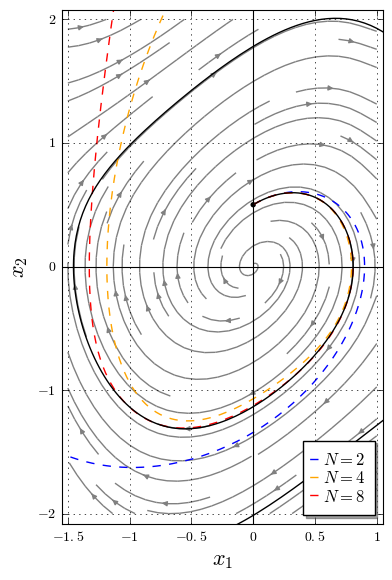

In [6]:
Graphic += point(x0, color="black", size=15)  # initial condition
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True,  
             axes_labels = ['$x_1$', '$x_2$'], aspect_ratio=1, legend_loc="lower right", 
             tick_formatter=[["$-1.5$","$-1$", "$-0.5$", "$0$", "$0.5$", "$1$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$"]],
            ticks=[[-1.5, -1, -0.5, 0, 0.5, 1], 
                   [-2, -1, 0, 1, 2]])

The figure format is guessed by the extension; `.png` is a possibility, but for better quality use `.pdf`.

In [25]:
Graphic.save("vanderpol_pp.pdf", aspect_ratio=1, gridlines=True, legend_loc="lower right",
             tick_formatter=[["$-1.5$","$-1$", "$-0.5$", "$0$", "$0.5$", "$1$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$"]],
             ticks=[[-1.5, -1, -0.5, 0, 0.5, 1], 
                   [-2, -1, 0, 1, 2]])

### Error bounds

Now we consider the error formula and compare the some simulations obtained with numerical integrator (Runge-Kutta) and the solution of the linarized system together with the error formula.

In [40]:
# select variable to plot
j = 1

GraphicTime = Graphics()
T=5.0
# integrate nonlinear equation with RK
S = vdp.solve(x0, tini, T, NPOINTS)
x_t = lambda i : S.interpolate_solution(i)

x_vs_t = plot(x_t(j), tini, T, axes_labels = ["$t$", "$x_1$"], gridlines=True, color="black")
GraphicTime += x_vs_t 

In [43]:
# solution using Carleman linearization of order N
from carlin.io import solve_ode_exp
from carlin.transformation import truncated_matrix, get_Fj_from_model

Fjnk = get_Fj_from_model(vdp.funcs(), vdp.dim(), vdp.degree())

# time domain is the same for all of them
tdom = srange(tini, T, (T-tini)/(NPOINTS-1)*1., include_endpoint=True)

AN_sp = lambda N : truncated_matrix(N, *Fjnk, input_format="Fj_matrices")
sol = lambda N : solve_ode_exp(AN_sp(N), x0=x0, N=N, tini=tini, T=T, NPOINTS=NPOINTS)

#====
N = 2
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, linestyle="dashed", color="blue", legend_label="$N=2$")

#====
N = 4
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, color="orange", linestyle="dashed", legend_label="$N=4$")

#====
N = 8
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, color="red", linestyle="dashed", legend_label="$N=8$")


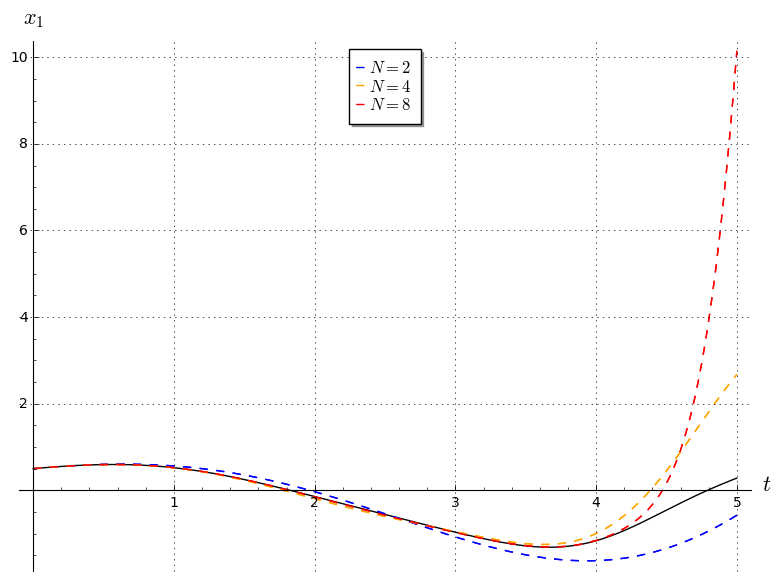

In [47]:
GraphicTime.show(gridlines=True, axes_labels = ["$t$", "$x_1$"], legend_loc="upper center")